In [1]:
import numpy as np

# Image analysis primer

A short lecture regarding a few useful things to know about images in the context of machine learning.

## Load images with `skimage` or `imageio`

You may have to install it with `$ pip install scikit-image`

In [2]:
from skimage.io import imread, imshow

Just give it a string filename.

In [3]:
im = imread("data/dog.jpg")

If `sklearn` can't read your file, try the `imageio` library.

## View images with imshow

`plt` and `skimage` have similar but slightly different implementations of `imshow`.

In [4]:
imshow( im )

## Images are matrices

The best practices for image files in Python is to store them in `numpy`-style arrays.

`skimage` has its own array type, but it's just `np.ndarray` under the hood.

In [5]:
type(im)

imageio.core.util.Array

In [6]:
im

Array([[[106,  94,  82],
        [110,  98,  86],
        [111,  99,  87],
        ...,
        [ 97,  96,  52],
        [ 95,  97,  47],
        [ 94,  99,  41]],

       [[106,  94,  82],
        [109,  97,  85],
        [114, 102,  90],
        ...,
        [ 95,  93,  52],
        [ 93,  95,  48],
        [ 96,  98,  48]],

       [[107,  93,  82],
        [106,  94,  82],
        [114, 102,  90],
        ...,
        [ 89,  87,  49],
        [ 85,  86,  46],
        [ 89,  90,  50]],

       ...,

       [[ 28,  23,  29],
        [ 29,  24,  30],
        [ 34,  29,  35],
        ...,
        [ 61,  46,  39],
        [ 58,  41,  34],
        [ 58,  41,  34]],

       [[ 28,  21,  28],
        [ 28,  21,  28],
        [ 30,  25,  29],
        ...,
        [ 62,  47,  40],
        [ 58,  41,  34],
        [ 57,  40,  33]],

       [[ 30,  24,  28],
        [ 29,  23,  27],
        [ 30,  25,  29],
        ...,
        [ 60,  45,  38],
        [ 58,  41,  34],
        [ 60,  43,  36]]

### Image `dtype`s.

Images arrays come in multiple "data types". This refers to the way the pixels are encoded as bytes. One common format is `uint8`; an unsigned 8-bit integer. `float32` and `float64` are both common. You need to know this because many libraries expect images to be a particular dtype format and will throw an error if they encounter something they don't expect.

`uint8` numbers are always integers between 0 and 255. If you see a bunch of numbers between 0 and 255, your image is probably stored as `uint8`.

### Image matrix shape

Color images are stored in _three dimensional_ matrices. 
* The first dimension is usually the height dimension starting from the _top_ of the image. 
* The second dimension is usually the width, starting from the left.
* The third dimension is usually the color. This is the "channel" dimension.

For example, the 0th row (the top), the 0th column (the left), and the 0th color (usually red) can be fetched from the image with:

In [7]:
im[0,0,0] #an unsigned integer

106

* **question** How would I grab a crop of the image?
* **question** How would I grab a single color channel?

Monochrome images may be store as matrices with a single channel (i.e., a matrix with shape `(n_rows, n_cols, 1)`), or a 2d-matrix (shape of `(n_rows, n_cols)`).

Images may sometimes have a fourth channel for transparency ("alpha channel"), or store the colors in an order other than the standard red-green-blue.

### `numpy` tricks with images

* Get a greyscale image: just average across the color dimension. This wouldn't really work if one of the channels is the alpha channel. 

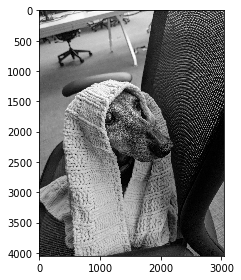

In [10]:
imshow( im.mean(axis=2).astype(np.uint8) )

Get a list of all pixels

In [11]:
im.reshape(-1,3)

Array([[106,  94,  82],
       [110,  98,  86],
       [111,  99,  87],
       ...,
       [ 60,  45,  38],
       [ 58,  41,  34],
       [ 60,  43,  36]], dtype=uint8)

Get the average color:

In [14]:
im.reshape(-1,3).mean(axis=0)

array([110.10424454, 100.27558413,  92.6581607 ])

Think of some of your own!

## skimage is full of useful tricks

Some of these are easy to do with `numpy` tricks, but some are kind of hard, like resize and rotation:

In [17]:
from skimage.transform import resize, rotate

In [20]:
im_prime = rotate( resize(im, (300,300)), 30 )

In [22]:
im_prime.shape #still just a matrix

(300, 300, 3)

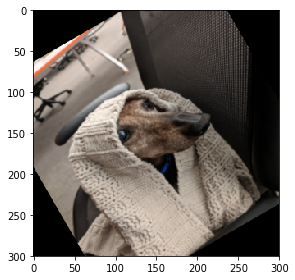

In [23]:
imshow( im_prime )

## skimage filters

In [29]:
from skimage.filters import hessian

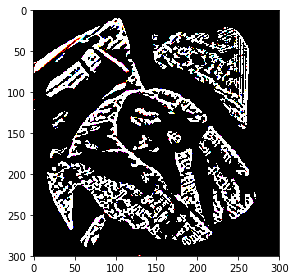

In [31]:
imshow( hessian( im_prime ) )

Have fun exploring! Filters can be useful for featurizing an image in preparation for supervised learning. We'll go more into the value of filters in the afternoon. 

## Images in machine learning

Sometimes a bunch of images come in the form of a "stack" of matrices:

In [64]:
from sklearn import datasets

digits = datasets.load_digits()

In [65]:
X = digits.images
y = digits.target

It's a 3-dimensional matrix, where the first dimension is the image, the second width, the third height:

In [66]:
X.shape

(1797, 8, 8)

This is a convenient format for viewing:

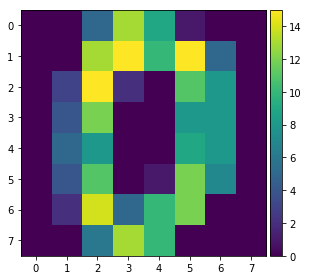

In [67]:
imshow( X[0] )

But most supervised learning implementations want a 2-d matrix `X`.

By far the most simple thing to do is simply squash each layer in the stack to a row, using `np.reshape`.

In [68]:
n_samples, n_cols, n_rows = X.shape
#the -1 means, "make this dimension whatever length it needs to be for the shape to work out"
#in this case, it stands in for '64'
X = X.reshape(n_samples, -1) 

In [69]:
X.shape

(1797, 64)

Ah, now we're on familiar ground.

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y) # train test split
clf = RandomForestClassifier(n_estimators=100)           # make model
clf.fit(X_train,y_train)                                 # fit to train
yhat = clf.predict(X_test)                               # predict on test
print( accuracy_score(y_test, yhat) )                    # score prediction

0.9844444444444445


Nice. It doesn't have to be hard.